### Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading and splitting the dataset

In [3]:
from sklearn.model_selection import train_test_split

#load dataset into dataframe
df = pd.read_csv('LEC_Winter_Season_2025.csv', sep=';')

# Define early game features manually based
early_game_features = ['GD@15', 'CSD@15', 'XPD@15', 'LVLD@15']

# Define and encode the target variable
target = 'Outcome'
df[target] = df[target].map({'Win': 1, 'Loss': 0})

# Features and labels
X = df[early_game_features]
y = df[target]

# Handle missing values (if any)
X = X.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression model and results

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64        47
           1       0.61      0.65      0.63        43

    accuracy                           0.63        90
   macro avg       0.63      0.63      0.63        90
weighted avg       0.64      0.63      0.63        90

Confusion Matrix:
 [[29 18]
 [15 28]]
Accuracy Score: 0.6333333333333333


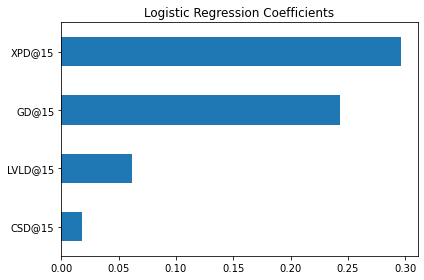

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define hyperparameter grid for regularization strength
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV (we keep default solver and penalty for simplicity)
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get best estimator
best_logreg = grid_search.best_estimator_

# Predictions with best model
y_pred_best = best_logreg.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_best ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best ))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best ))

# Visualize feature importance (coefficients)
coefficients = pd.Series(best_logreg.coef_[0], index=early_game_features)
coefficients.sort_values().plot(kind='barh', title='Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

### Random forst model and results

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.55      0.60        47
           1       0.58      0.67      0.62        43

    accuracy                           0.61        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.62      0.61      0.61        90

Confusion Matrix:
 [[26 21]
 [14 29]]
Accuracy Score: 0.6111111111111112


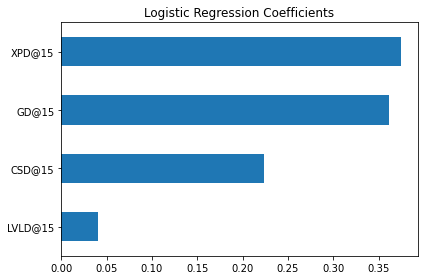

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    "n_estimators": [50, 100, 200], 
    "max_depth": [5, 10, 20],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

# Get best estimator
best_rf = grid_search.best_estimator_

# Predictions with best model
y_pred_best = best_rf.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_best ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best ))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best ))

# Visualize feature importance (coefficients)
importances = pd.Series(best_rf.feature_importances_, index=early_game_features)
importances.sort_values().plot(kind='barh', title='Random Forest Coefficients')
plt.tight_layout()
plt.show()

### Gradient Boosting model and results

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.55      0.60        47
           1       0.58      0.67      0.62        43

    accuracy                           0.61        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.62      0.61      0.61        90

Confusion Matrix:
 [[26 21]
 [14 29]]
Accuracy Score: 0.6111111111111112


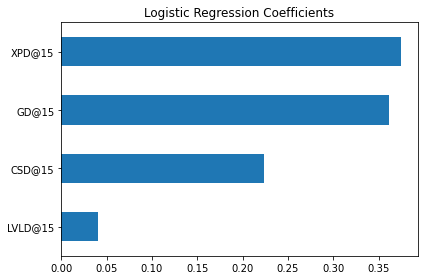

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#  Define parameter grid
gb_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
}

# Grid search setup
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),gb_param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

# Best estimator
best_gb = grid_search.best_estimator_

# Predictions with best model
y_pred_best = best_rf.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_best ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best ))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best ))

# Visualize feature importance (coefficients)
importances = pd.Series(best_rf.feature_importances_, index=early_game_features)
importances.sort_values().plot(kind='barh', title='Gradient Boost Coefficients')
plt.tight_layout()
plt.show()